In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

In [2]:
sand_good = pd.read_csv('data/mined-data/sand-change-(good)/sand-only/all.dat', sep=",")
buried_good = pd.read_csv('data/mined-data/sand-change-(good)/buried/all.dat', sep=",")

In [3]:
goodX = sand_good.append(buried_good).to_numpy()
goodY = np.array([0] * len(sand_good) + [1] * len(buried_good))

In [4]:
buried_1 = pd.read_csv('data/mined-data/new/16-10-2020-1/all.dat', sep=",") # label up, #1

In [5]:
# train model on 'up' data
model = LogisticRegression(solver='liblinear', penalty='l1', C=100, random_state=42).fit(goodX, goodY)

In [6]:
model.score(goodX, goodY)

0.9996124281377172

In [7]:
# test model on unseen data (up)
model.score(buried_1, [1] * len(buried_1))

0.961038961038961

In [8]:
buried_2 = pd.read_csv('data/mined-data/new/16-10-2020-2/all.dat', sep=",") # buried_2 = up #1 (bad)
buried_3 = pd.read_csv('data/mined-data/new/16-10-2020-3/all.dat', sep=",") # buried_3 = down #1
buried_4 = pd.read_csv('data/mined-data/new/16-10-2020-4/all.dat', sep=",") # buried_4 = down #1

In [9]:
model.score(buried_2, [1] * len(buried_2))

1.0

In [10]:
buried_5 = pd.read_csv('data/mined-data/new/21-10-2020-3/all.dat', sep=",") # buried_5 = up #1
buried_6 = pd.read_csv('data/mined-data/new/21-10-2020-4/all.dat', sep=",") # buried_6 = up #1

In [11]:
# test for 'down' data
print(model.score(buried_3, [1] * len(buried_3)))
print(model.score(buried_4, [1] * len(buried_4)))

0.2880184331797235
0.007992007992007992


In [12]:
# make sure it somewhat works on 'up' data
print(model.score(buried_5, [1] * len(buried_5)))
print(model.score(buried_6, [1] * len(buried_6)))

0.7025948103792415
0.8363273453093812


In [13]:
# load sand only to check if it works
sand_1 = pd.read_csv('data/mined-data/new/08-10-2020-1/all.dat', sep=",")
sand_2 = pd.read_csv('data/mined-data/new/12-10-2020-1/all.dat', sep=",")
sand_3 = pd.read_csv('data/mined-data/new/12-10-2020-2/all.dat', sep=",")

In [14]:
print(model.score(sand_1, [0] * len(sand_1)))
print(model.score(sand_2, [0] * len(sand_2)))
print(model.score(sand_3, [0] * len(sand_3)))

0.8095502498611882
0.3596551724137931
0.1


It doesn't work very well. Changing parameters doesn't help. Only way is to combine all the good data and train with cross-validation.

First, load all data and label them:

In [16]:
# sand only
sand_good = pd.read_csv('data/mined-data/sand-change-(good)/sand-only/all.dat', sep=",")
sand_08 = pd.read_csv('data/mined-data/new/08-10-2020-1/all.dat', sep=",")
sand_121 = pd.read_csv('data/mined-data/new/12-10-2020-1/all.dat', sep=",")
sand_122 = pd.read_csv('data/mined-data/new/12-10-2020-2/all.dat', sep=",")
sand_231 = pd.read_csv('data/mined-data/new/23-10-2020-1/all.dat', sep=",")

# buried
buried_good = pd.read_csv('data/mined-data/sand-change-(good)/buried/all.dat', sep=",")

buried_082_near_1 = pd.read_csv('data/mined-data/new/08-10-2020-2/all.dat', sep=",")
buried_083_10cm_2 = pd.read_csv('data/mined-data/new/08-10-2020-3/all.dat', sep=",")
buried_084_10cm_3 = pd.read_csv('data/mined-data/new/08-10-2020-4/all.dat', sep=",")
buried_085_18cm_4 = pd.read_csv('data/mined-data/new/08-10-2020-5/all.dat', sep=",")
buried_086_8cm_4 = pd.read_csv('data/mined-data/new/08-10-2020-6/all.dat', sep=",")

buried_123_7cm_1 = pd.read_csv('data/mined-data/new/12-10-2020-3/all.dat', sep=",")
buried_124_7cm_1 = pd.read_csv('data/mined-data/new/12-10-2020-4/all.dat', sep=",")
buried_125_7cm_3 = pd.read_csv('data/mined-data/new/12-10-2020-5/all.dat', sep=",")

buried_161_up_1 = pd.read_csv('data/mined-data/new/16-10-2020-1/all.dat', sep=",")
buried_162_up_1 = pd.read_csv('data/mined-data/new/16-10-2020-2/all.dat', sep=",")
buried_163_down_1 = pd.read_csv('data/mined-data/new/16-10-2020-3/all.dat', sep=",")
buried_164_down_1 = pd.read_csv('data/mined-data/new/16-10-2020-4/all.dat', sep=",")

buried_211_down_1 = pd.read_csv('data/mined-data/new/21-10-2020-1/all.dat', sep=",")
buried_212_down_1 = pd.read_csv('data/mined-data/new/21-10-2020-2/all.dat', sep=",")
buried_213_up_1 = pd.read_csv('data/mined-data/new/21-10-2020-3/all.dat', sep=",")
buried_214_up_1 = pd.read_csv('data/mined-data/new/21-10-2020-4/all.dat', sep=",")

In [17]:
sand_all = [sand_good, sand_08, sand_121, sand_122, sand_231]
buried_all = [buried_good,
             buried_082_near_1, buried_083_10cm_2, buried_084_10cm_3, buried_085_18cm_4, buried_086_8cm_4,
             buried_123_7cm_1, buried_124_7cm_1, buried_125_7cm_3, 
             buried_161_up_1, buried_162_up_1, buried_163_down_1, buried_164_down_1, 
             buried_211_down_1, buried_212_down_1, buried_213_up_1, buried_214_up_1]

In [18]:
slen = []
for s in sand_all:
    slen.append(len(s))
blen = []
for b in buried_all:
    blen.append(len(b))

In [19]:
print('sand:', slen, '->' , np.sum(slen))
print('buried:', blen, '->' , np.sum(blen))

sand: [7481, 1801, 2900, 2300, 2002] -> 16484
buried: [8000, 1301, 1601, 1801, 1901, 801, 1602, 1701, 1595, 1001, 1401, 1302, 1001, 3001, 3401, 501, 501] -> 32412


As we see, buried data is much more than sand data. We can remove some of it and use it as the test data afterwards. 

In [20]:
buried_all = [buried_good, buried_211_down_1, buried_212_down_1, buried_213_up_1, buried_214_up_1]

In [21]:
sand = np.concatenate(tuple(sand_all))
buried = np.concatenate(tuple(buried_all))
print('sand:', len(sand))
print('buried:', len(buried))

sand: 16484
buried: 15404


In [22]:
X = np.concatenate((sand, buried))
Y = [0] * len(sand) + [1] * len(buried)

In [23]:
model = LogisticRegression(solver='liblinear', penalty='l1', C=100, random_state=42).fit(X, Y)

In [24]:
model.score(X, Y)

0.9806196688409433

In [25]:
# test model on unseen data:
print(model.score(buried_082_near_1, [1] * len(buried_082_near_1))) #
print(model.score(buried_083_10cm_2, [1] * len(buried_083_10cm_2))) #
print(model.score(buried_084_10cm_3, [1] * len(buried_084_10cm_3))) #
print(model.score(buried_085_18cm_4, [1] * len(buried_085_18cm_4))) #
print(model.score(buried_086_8cm_4, [1] * len(buried_086_8cm_4))) #
print(model.score(buried_123_7cm_1, [1] * len(buried_123_7cm_1))) #
print(model.score(buried_124_7cm_1, [1] * len(buried_124_7cm_1))) #
print(model.score(buried_125_7cm_3, [1] * len(buried_125_7cm_3))) #
print(model.score(buried_161_up_1, [1] * len(buried_161_up_1)))
print(model.score(buried_162_up_1, [1] * len(buried_162_up_1)))
print(model.score(buried_163_down_1, [1] * len(buried_163_down_1)))
print(model.score(buried_164_down_1, [1] * len(buried_164_down_1)))

0.08455034588777863
0.008744534665833853
0.334258745141588
0.2698579694897422
0.02122347066167291
0.3052434456928839
0.48853615520282184
0.28025078369905954
0.922077922077922
0.9193433261955746
0.8740399385560675
0.8571428571428571


It somewhat seems like model can correctly predict for newer unseen data, but fails for old data. This might be because sand's properties changed over time, because of the humidity and whatnot. Let's search optimal parameters for this model and do some more tests on newer data.

In [26]:
model = LogisticRegression(solver='liblinear', penalty='l1', C=183.9, max_iter=201, random_state=42).fit(X, Y)

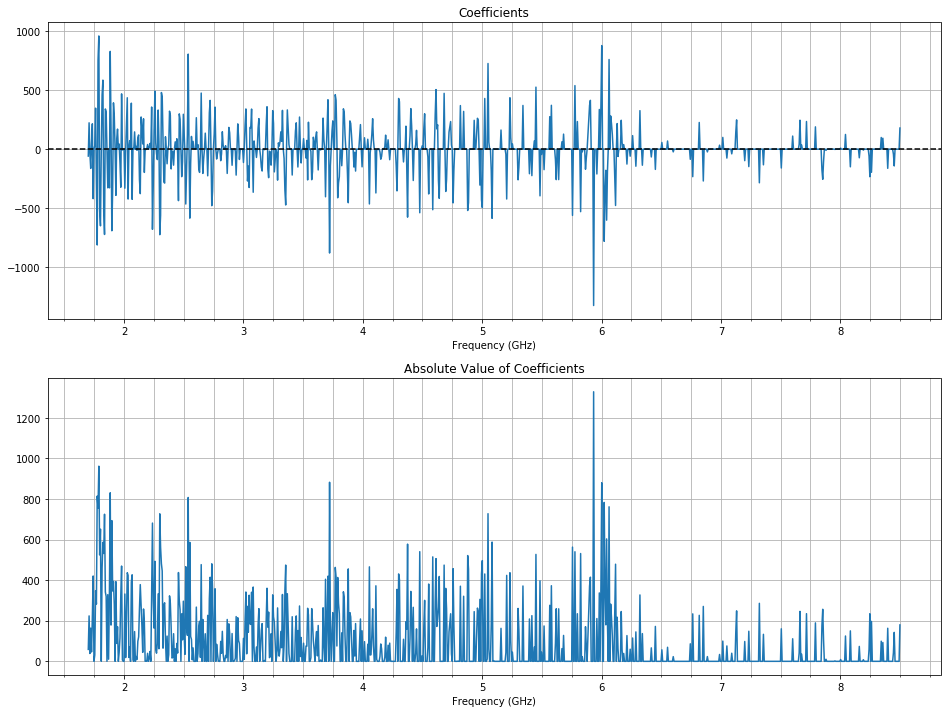

In [32]:
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(16, 12))
ax1, ax2 = fig.subplots(2, 1)

ax1.plot(np.linspace(1.7, 8.5, 1000), model.coef_[0])
ax1.grid(True, which='both')
ax1.axhline(0, ls='--', color='k')
ax1.xaxis.set_minor_locator(MultipleLocator(0.25))
ax1.set_title('Coefficients')
ax1.set_xlabel('Frequency (GHz)')


ax2.plot(np.linspace(1.7, 8.5, 1000), np.abs(model.coef_[0]))
ax2.grid(True, which='both')
ax2.xaxis.set_minor_locator(MultipleLocator(0.25))
ax2.set_title('Absolute Value of Coefficients')
ax2.set_xlabel('Frequency (GHz)')

plt.show()